# La Liga - Clutch Analysis - 2017/18 Season

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df_table = pd.read_csv('laliga1718_goals.csv')

In [90]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 100)

In [91]:
#cols = df.columns

In [92]:
#df_table = df.drop(columns=['Unnamed: 0', 'fixture_id', 'updated_score',
#                            'score_a', 'score_b', 'score_grade', 'time_weight'], axis=1)
df_table.extra_minute.fillna(False, inplace=True)
df_table.head()

,Unnamed: 0,goal_player,assist_player,penalty,own_goal,minute,extra_minute,fixture_id,team,opponent,updated_score,score_a,score_b,tied,up_1,up_2,down_1,score_grade,time_weight,clutch_score,winner,loser,draw_match,final_score
0,0,José Luis Morales,None,True,False,88,False,4193968,Levante,Villarreal,"[1, 0]",1,0,False,True,False,False,5.0,0.88,4.40,Levante,Villarreal,False,"[1, 0]"
1,1,Willian José,None,True,False,88,False,4193969,Real Sociedad,Celta de Vigo,"[2, 3]",2,3,False,True,False,False,5.0,0.88,4.40,Real Sociedad,Celta de Vigo,False,"[2, 3]"
2,2,Juanmi,Willian José,False,False,80,False,4193969,Real Sociedad,Celta de Vigo,"[2, 2]",2,2,True,False,False,False,4.5,0.80,3.60,Real Sociedad,Celta de Vigo,False,"[2, 3]"
3,3,Maxi Gómez,Gustavo Cabral,False,False,50,False,4193969,Celta de Vigo,Real Sociedad,"[2, 1]",2,1,False,True,False,False,5.0,0.50,2.50,Real Sociedad,Celta de Vigo,False,"[2, 3]"
4,4,Mikel Oyarzabal,None,False,False,33,False,4193969,Real Sociedad,Celta de Vigo,"[1, 1]",1,1,True,False,False,False,3.0,0.33,0.99,Real Sociedad,Celta de Vigo,False,"[2, 3]"


In [93]:
# Only goals/assists that are: not penalty, ties, or raise score by 1 or 2
clutch_table = df_table[(df_table.penalty == False) & (
               (df_table.tied == True) | (df_table.up_1 == True) | (df_table.up_2 == True))]

## Top Scoring Players & their Clutch Scores

In [94]:
# List - SEASON's Top 10 scoring players 
top10_scorers_lst = df_table.goal_player.value_counts().head(10).index

# Dataframe - Top 10 scorers 
top10_scorers = df_table[df_table.goal_player.isin(top10_scorers_lst)]

# List - TOTAL Goal Count - Top 10 scoring players
top10_goalcount = top10_scorers.goal_player.value_counts()

# Dataframe - Clutch Goals in 90min
top10_scorers90 = clutch_table[clutch_table.goal_player.isin(top10_scorers_lst)]

# List - Goal Count - AFTER 75TH MINUTE Top 10 scoring players
top10_goalcount90 = top10_scorers90.goal_player.value_counts()

# List - Avg 'clutch_score' - AFTER 75TH MINUTE Top 10 scoring players
top10_avgclutch90 = top10_scorers90.groupby('goal_player')['clutch_score'].agg(np.mean)

In [95]:
df_top10 = pd.concat([top10_avgclutch90, top10_goalcount90, top10_goalcount], axis=1, sort=False).reset_index()
df_top10.columns = ['player', 'clutch_score', 'clutch_goals', 'total_goals']
df_top10 = df_top10.sort_values(by='clutch_score', ascending=False).reset_index(drop=True)
df_top10

,player,clutch_score,clutch_goals,total_goals
0,Gerard Moreno,2.221071,14,16
1,Cristiano Ronaldo,2.045333,15,26
2,Antoine Griezmann,1.859167,12,19
3,Maxi Gómez,1.810588,17,18
4,Lionel Messi,1.728333,24,34
5,Luis Suárez,1.707500,16,25
6,Rodrigo Moreno,1.611364,11,16
7,Iago Aspas,1.539583,12,24
8,Cristhian Stuani,1.350833,12,19
9,Gareth Bale,1.306786,14,16


## Top Assists Players & their Clutch Scores

In [96]:
# List - SEASON's Top 5 assists players 
assists_table = df_table[df_table.assist_player != "None"]
top5a_lst = assists_table.assist_player.value_counts().head(5).index

# Dataframe - Top 5 assists
top5a = assists_table[assists_table.assist_player.isin(top5a_lst)]

# List - TOTAL Assists Count - Top 5 assists players
top5a_cnt = top5a.assist_player.value_counts()

# Dataframe - Clutch Assists in 90min
clutch_assist_table = clutch_table[clutch_table.assist_player != "None"]
top5a_90 = clutch_assist_table[clutch_assist_table.assist_player.isin(top5a_lst)]

# List - Assist Count
top5a_cnt90 = top5a_90.assist_player.value_counts()

# List - Avg 'clutch_score'
top5a_avgclutch90 = top5a_90.groupby('assist_player')['clutch_score'].agg(np.mean)

In [97]:
df_top5a = pd.concat([top5a_avgclutch90, top5a_cnt90, top5a_cnt], axis=1, sort=False).reset_index()
df_top5a.columns = ['player', 'clutch_score', 'clutch_assists', 'total_assists']
df_top5a = df_top5a.sort_values(by='clutch_score', ascending=False).reset_index(drop=True)
df_top5a

,player,clutch_score,clutch_assists,total_assists
0,Luis Suárez,2.439286,7,12
1,Karim Benzema,1.920714,7,10
2,Lionel Messi,1.874444,9,12
3,Daniel Wass,1.838333,6,10
4,Pablo Fornals,1.631250,8,12


## Most Clutch Goals

In [98]:
# Clutch Goal DataFrame for those with 14+ Goals
most_clutch_g = df_table[(df_table.penalty == False) & ((df_table.tied == True) | (df_table.up_1 == True) |
        (df_table.up_2 == True))].groupby('goal_player').filter(lambda x: len(x) >= 14).sort_values(['goal_player'])

# Clutch Goal Count
most_clutch_g_cnt = most_clutch_g.goal_player.value_counts()

# Clutch Goal Score
most_clutch_g_score = most_clutch_g.groupby('goal_player')['clutch_score'].agg(np.mean)

In [99]:
df_most_clutch_g = pd.concat([most_clutch_g_cnt, most_clutch_g_score], axis=1, sort=False).reset_index()
df_most_clutch_g.columns = ['Player', 'Clutch Goals', 'Goal Clutch Score']
df_most_clutch_g = df_most_clutch_g.sort_values(by='Goal Clutch Score', ascending=False).reset_index(drop=True)
df_most_clutch_g

,Player,Clutch Goals,Goal Clutch Score
0,Gerard Moreno,14,2.221071
1,Cristiano Ronaldo,15,2.045333
2,Maxi Gómez,17,1.810588
3,Lionel Messi,24,1.728333
4,Luis Suárez,16,1.707500
5,Gareth Bale,14,1.306786


## Most Clutch Assists

In [100]:
#clutch_assist OVERALL (8+ Assists)
most_clutch_a = df_table[(df_table.penalty == False) & (df_table.assist_player != "None") & ((df_table.tied == True) | (df_table.up_1 == True) | (df_table.up_2 == True))].groupby('assist_player').filter(lambda x: len(x) >= 8).sort_values(['assist_player'])

# Clutch Assist Count
most_clutch_a_cnt = most_clutch_a.assist_player.value_counts()

# Clutch Assist Score
most_clutch_a_score = most_clutch_a.groupby('assist_player')['clutch_score'].agg(np.mean)

In [101]:
df_most_clutch_a = pd.concat([most_clutch_a_cnt, most_clutch_a_score], axis=1, sort=False).reset_index()
df_most_clutch_a.columns = ['Player', 'Clutch Assists', 'Assist Clutch Score']
df_most_clutch_a = df_most_clutch_a.sort_values(by='Assist Clutch Score', ascending=False).reset_index(drop=True)
df_most_clutch_a

,Player,Clutch Assists,Assist Clutch Score
0,Andrés Guardado,8,2.320625
1,Lionel Messi,9,1.874444
2,José Luis Morales,8,1.643125
3,Pablo Fornals,8,1.631250


## Most Clutch Goals after 75th minute

In [104]:
#clutch_goal AFTER 75 (3+ Goals)
most_clutch_g75 = df_table[(df_table.minute >= 75) & ((df_table.tied == True) | (df_table.up_1 == True) | (df_table.up_2 == True))].groupby('goal_player').filter(lambda x: len(x) >= 3).sort_values(['goal_player'])

# Clutch Goal Count After 75th
most_clutch_g75_cnt = most_clutch_g75.goal_player.value_counts()

# Clutch Goal Score After 75th
most_clutch_g75_score = most_clutch_g75.groupby('goal_player')['clutch_score'].agg(np.mean)

In [726]:
clutch_g75_totals = df_table[df_table.goal_player.isin(df_most_clutch_g75.Player)].groupby('goal_player')['goal_player'].count()

In [728]:
df_most_clutch_g75 = pd.concat([most_clutch_g75_cnt, clutch_g75_totals, most_clutch_g75_score], axis=1, sort=False).reset_index()
df_most_clutch_g75.columns = ['Player', 'Clutch Goals (after 75th)', 'Total Goals', 'Goal Clutch Score (after 75th)']
df_most_clutch_g75 = df_most_clutch_g75.sort_values(by='Total Goals', ascending=False).reset_index(drop=True)
df_most_clutch_g75

,Player,Clutch Goals (after 75th),Total Goals,Goal Clutch Score (after 75th)
0,Lionel Messi,6,34,2.882500
1,Cristiano Ronaldo,4,26,3.715000
2,Maxi Gómez,4,18,3.353750
3,Gerard Moreno,3,16,3.615000
4,Ángel Rodríguez,4,13,3.027500
5,José Luis Morales,3,10,2.841667
6,Daniel Parejo,3,7,3.508333
7,Enes Ünal,3,6,2.978333


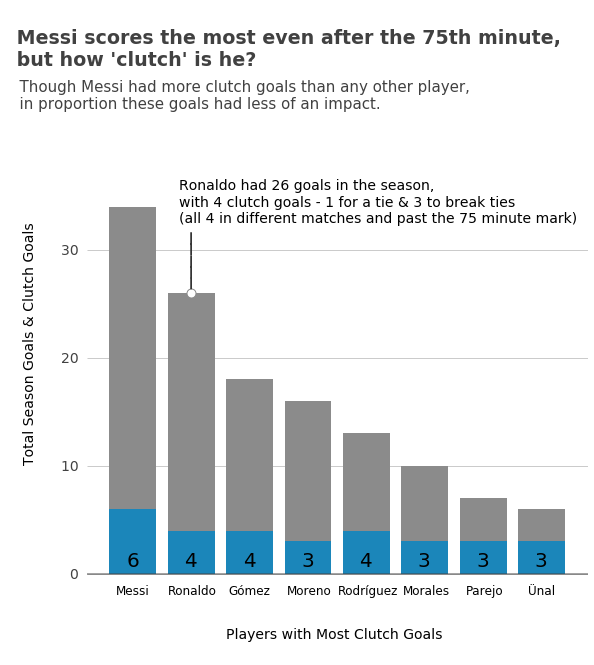

In [887]:
import matplotlib.style as style
style.use('fivethirtyeight')

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 10))

fig.set_facecolor("white")
fig.set_edgecolor("white")

# Plot total goals
ax = sns.barplot(x="Player", y="Total Goals", data=df_most_clutch_g75,
            label="Total Goals", color = '#8B8B8B')
ax.set_facecolor('white')

# Bolded horizontal line at y=0
ax.axhline(y=0, color='#414141', linewidth=1.9, alpha=.5)

# Y-labels to only these
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(labels=['0 ', '10 ', '20 ', '30 '], fontsize=14, color='#414141')
ax.set_xticklabels(['Messi', 'Ronaldo', 'A. Rodriguez', 'D. Parejo', 'Paulinho', 'Suarez'], fontsize=14, color='#414141')

# Plot Goals after 80
ax1 = sns.barplot(x="Player", y="Clutch Goals (after 75th)", data=df_most_clutch_g75, label="", color="#008FD5")
ax1.set_facecolor('white')
ax1.set_xticklabels([""])

# Text comments on graph
ax.text(x=-0.285, y=-2, s="Messi", fontsize=12, color='black')
ax.text(x=0.6, y=-2, s="Ronaldo", fontsize=12, color='black')
ax.text(x=1.64, y=-2, s="Gómez", fontsize=12, color='black')
ax.text(x=2.64, y=-2, s="Moreno", fontsize=12, color='black')
ax.text(x=3.52, y=-2, s="Rodríguez", fontsize=12, color='black')
ax.text(x=4.629, y=-2, s="Morales", fontsize=12, color='black')
ax.text(x=5.71, y=-2, s="Parejo", fontsize=12, color='black')
ax.text(x=6.77, y=-2, s="Ünal", fontsize=12, color='black')

# Goals 80th
ax.text(x=-0.1, y=.6, s="6", fontsize=20, color='black')
ax.text(x=0.88, y=.6, s="4", fontsize=20, color='black')
ax.text(x=1.88, y=.6, s="4", fontsize=20, color='black')
ax.text(x=2.88, y=.6, s="3", fontsize=20, color='black')
ax.text(x=3.88, y=.6, s="4", fontsize=20, color='black')
ax.text(x=4.88, y=.6, s="3", fontsize=20, color='black')
ax.text(x=5.88, y=.6, s="3", fontsize=20, color='black')
ax.text(x=6.88, y=.6, s="3", fontsize=20, color='black')

# Title
ax.text(x=-2.1, y=47, s="\n Messi scores the most even after the 75th minute, \n but how 'clutch' is he?", fontsize=19, fontweight='bold', color='#414141')
ax.text(x=-2.1, y=43, s="  Though Messi had more clutch goals than any other player,\n  in proportion these goals had less of an impact.", fontsize=15, color='#414141')

# Comment
ax.text(x=0.8, y=32.5, s="Ronaldo had 26 goals in the season,\nwith 4 clutch goals - 1 for a tie & 3 to break ties\n(all 4 in different matches and past the 75 minute mark)")
# Line pointer
ax.text(x=0.65, y=30.05, s='_____', fontsize=23, color='#333333', rotation=90)
# Circular marker at 62%
ax.plot(0.99, 26, 'o', markersize=9, color='white', markeredgecolor='#8B8B8B')

# Y & X axis labels
ax1.text(x=1.6, y=-7.5, s='Players with Most Clutch Goals\n', fontsize=14, fontweight='medium', color='black')
ax1.text(x=-2.15, y=30, s='\nTotal Season Goals & Clutch Goals', fontsize=14, fontweight='medium', color='black', rotation=90)

# spines and axis
ax.set(ylim=(-4, 50), ylabel="", xlabel="")
sns.despine(left=True, bottom=True)

In [820]:
most_clutch_g75[most_clutch_g75.goal_player == "Cristiano Ronaldo"]

,Unnamed: 0,goal_player,assist_player,penalty,own_goal,minute,extra_minute,fixture_id,team,opponent,updated_score,score_a,score_b,tied,up_1,up_2,down_1,score_grade,time_weight,clutch_score,winner,loser,draw_match,final_score
874,874,Cristiano Ronaldo,Luka Modric,False,False,87,False,4194296,Real Madrid,Athletic Club,"[1, 1]",1,1,True,False,False,False,3.0,0.87,2.61,False,False,True,"[1, 1]"
196,196,Cristiano Ronaldo,Isco,False,False,85,False,4194039,Real Madrid,Getafe,"[1, 2]",1,2,False,True,False,False,5.0,0.85,4.25,Real Madrid,Getafe,False,"[1, 2]"
351,351,Cristiano Ronaldo,None,False,False,76,False,4194093,Real Madrid,Málaga,"[3, 2]",3,2,False,True,False,False,5.0,0.76,3.80,Real Madrid,Málaga,False,"[3, 2]"
730,730,Cristiano Ronaldo,Daniel Carvajal,False,False,84,False,4194238,Real Madrid,Eibar,"[1, 2]",1,2,False,True,False,False,5.0,0.84,4.20,Real Madrid,Eibar,False,"[1, 2]"


## Most Clutch Assists after 75th minute

In [106]:
#clutch_assist AFTER 75 (3+ Assists)
most_clutch_a75 = df_table[(df_table.minute >= 75) & (df_table.assist_player != "None") & ((df_table.tied == True) | (df_table.up_1 == True) | (df_table.up_2 == True))].groupby('assist_player').filter(lambda x: len(x) >= 3).sort_values(['assist_player'])

# Clutch Assist Count After 75th
most_clutch_a75_cnt = most_clutch_a75.assist_player.value_counts()

# Clutch Assist Score After 75th
most_clutch_a75_score = most_clutch_a75.groupby('assist_player')['clutch_score'].agg(np.mean)

In [107]:
df_most_clutch_a75 = pd.concat([most_clutch_a75_cnt, most_clutch_a75_score], axis=1, sort=False).reset_index()
df_most_clutch_a75.columns = ['Player', 'Clutch Assists (after 75th)', 'Assist Clutch Score (after 75th)']
df_most_clutch_a75 = df_most_clutch_a75.sort_values(by='Assist Clutch Score (after 75th)', ascending=False).reset_index(drop=True)
df_most_clutch_a75

,Player,Clutch Assists (after 75th),Assist Clutch Score (after 75th)
0,Antonio Barragán,3,4.616667
1,Lionel Messi,3,3.040000


## Top Clutch Teams after 75th minute

In [108]:
#TEAMS clutch_goal AFTER 75 (9+ Goals)
top_clutch_teams75 = df_table[(df_table.minute >= 75) & ((df_table.tied == True) | (df_table.up_1 == True) | (df_table.up_2 == True))].groupby('team').filter(lambda x: len(x) >= 8).sort_values(['team'])

# Clutch Goal Count After 75th
top_clutch_teams75_cnt = top_clutch_teams75.team.value_counts()

# Clutch Goal Score After 75th
top_clutch_teams75_score = top_clutch_teams75.groupby('team')['clutch_score'].agg(np.mean)

In [109]:
df_top_clutch_teams75 = pd.concat([top_clutch_teams75_cnt, top_clutch_teams75_score], axis=1, sort=False).reset_index()
df_top_clutch_teams75.columns = ['Team', 'Clutch Goals (after 75th)', 'Goal Clutch Score (after 75th)']
df_top_clutch_teams75 = df_top_clutch_teams75.sort_values(by='Goal Clutch Score (after 75th)', ascending=False).reset_index(drop=True)
df_top_clutch_teams75

,Team,Clutch Goals (after 75th),Goal Clutch Score (after 75th)
0,Real Betis,13,3.728846
1,Celta de Vigo,9,3.373889
2,Levante,11,3.333182
3,Real Sociedad,11,3.272273
4,Valencia,8,3.128125
5,Espanyol,8,3.062500
6,Villarreal,9,2.973889
7,Barcelona,12,2.781250


In [484]:
# Goals FOR each of these teams
betis_g = df_table[df_table.team == "Real Betis"]
betis_cg = clutch_table[clutch_table.team == "Real Betis"]

barcelona_g = df_table[df_table.team == "Barcelona"]
barcelona_cg = clutch_table[clutch_table.team == "Barcelona"]

villarreal_g = df_table[df_table.team == "Villarreal"]
villarreal_cg = clutch_table[clutch_table.team == "Villarreal"]

levante_g = df_table[df_table.team == "Levante"]
levante_cg = clutch_table[clutch_table.team == "Levante"]

In [485]:
# Goals AGAINST each of these teams
betis_against_g = df_table[df_table.opponent == "Real Betis"]
betis_against_cg = clutch_table[clutch_table.opponent == "Real Betis"]

barcelona_against_g = df_table[df_table.opponent == "Barcelona"]
barcelona_against_cg = clutch_table[clutch_table.opponent == "Barcelona"]

villarreal_against_g = df_table[df_table.opponent == "Villarreal"]
villarreal_against_cg = clutch_table[clutch_table.opponent == "Villarreal"]

levante_against_g = df_table[df_table.opponent == "Levante"]
levante_against_cg = clutch_table[clutch_table.opponent == "Levante"]

In [486]:
# Counting goals FOR according to bins (time periods)
minute_bins = [0, 15, 30, 45, 60, 75, 90]   

# Barcelona
barca_binned = pd.cut(barcelona_g.minute, bins=minute_bins)
barca_counts = pd.value_counts(barca_binned).sort_index()

barca_clutch_binned = pd.cut(barcelona_cg.minute, bins=minute_bins)
barca_clutch_counts = pd.value_counts(barca_clutch_binned).sort_index()

# Betis
betis_binned = pd.cut(betis_g.minute, bins=minute_bins)
betis_counts = pd.value_counts(betis_binned).sort_index()

betis_clutch_binned = pd.cut(betis_cg.minute, bins=minute_bins)
betis_clutch_counts = pd.value_counts(betis_clutch_binned).sort_index()

# Villarreal
villarreal_binned = pd.cut(villarreal_g.minute, bins=minute_bins)
villarreal_counts = pd.value_counts(villarreal_binned).sort_index()

villarreal_clutch_binned = pd.cut(villarreal_cg.minute, bins=minute_bins)
villarreal_clutch_counts = pd.value_counts(villarreal_clutch_binned).sort_index()

# Levante
levante_binned = pd.cut(levante_g.minute, bins=minute_bins)
levante_counts = pd.value_counts(levante_binned).sort_index()

levante_clutch_binned = pd.cut(levante_cg.minute, bins=minute_bins)
levante_clutch_counts = pd.value_counts(levante_clutch_binned).sort_index()

In [487]:
# Counting goals AGAINST according to bins (time periods)
minute_bins = [0, 15, 30, 45, 60, 75, 90]   

# Barcelona
barca_against_binned = pd.cut(barcelona_against_g.minute, bins=minute_bins)
barca_against_counts = pd.value_counts(barca_against_binned).sort_index()

barca_against_clutch_binned = pd.cut(barcelona_against_cg.minute, bins=minute_bins)
barca_against_clutch_counts = pd.value_counts(barca_against_clutch_binned).sort_index()

# Betis
betis_against_binned = pd.cut(betis_against_g.minute, bins=minute_bins)
betis_against_counts = pd.value_counts(betis_against_binned).sort_index()

betis_against_clutch_binned = pd.cut(betis_against_cg.minute, bins=minute_bins)
betis_against_clutch_counts = pd.value_counts(betis_against_clutch_binned).sort_index()


# Villarreal
villarreal_against_binned = pd.cut(villarreal_against_g.minute, bins=minute_bins)
villarreal_against_counts = pd.value_counts(villarreal_against_binned).sort_index()

villarreal_against_clutch_binned = pd.cut(celta_against_cg.minute, bins=minute_bins)
villarreal_against_clutch_counts = pd.value_counts(villarreal_against_clutch_binned).sort_index()

# Levante
levante_against_binned = pd.cut(levante_against_g.minute, bins=minute_bins)
levante_against_counts = pd.value_counts(levante_binned).sort_index()

levante_against_clutch_binned = pd.cut(levante_against_cg.minute, bins=minute_bins)
levante_against_clutch_counts = pd.value_counts(levante_against_clutch_binned).sort_index()

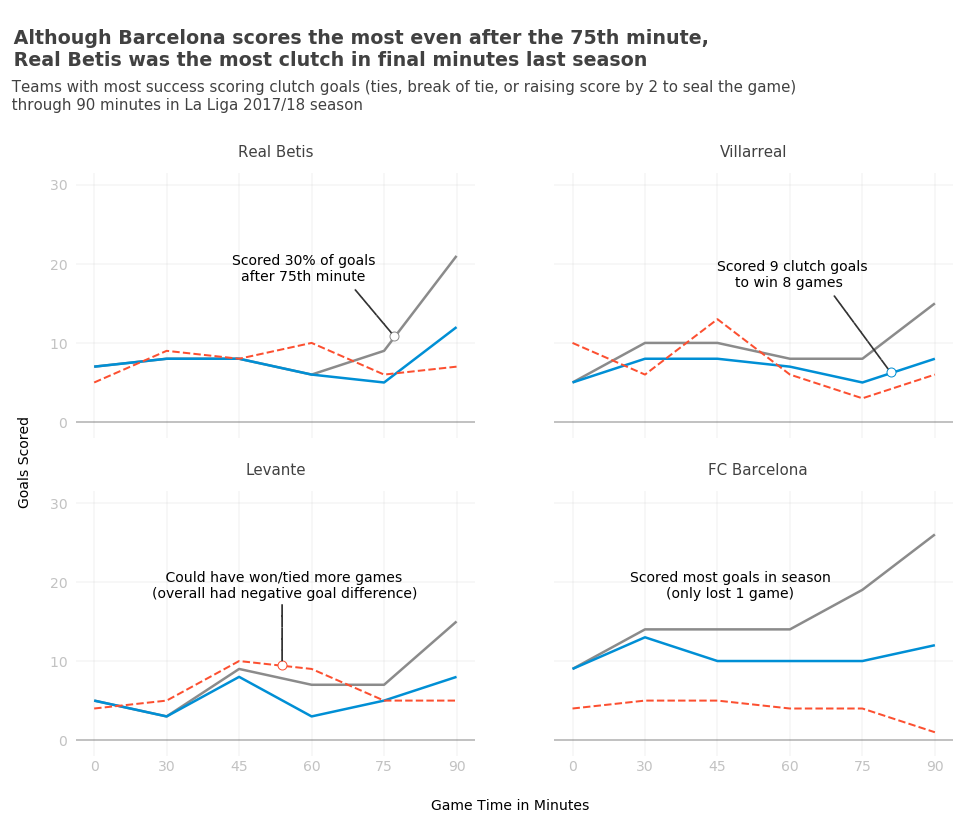

In [701]:
import matplotlib.style as style
style.use('fivethirtyeight')

# Initialize the matplotlib figure
fig = plt.figure(figsize=(14, 10))

fig.set_facecolor("white")
fig.set_edgecolor("white")

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


# Plot total goals
x_vals = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90']

sns.lineplot(x=x_vals, y=betis_counts.values, lw=2.5, color='#8B8B8B', ax=ax1)
sns.lineplot(x=x_vals, y=betis_clutch_counts.values, lw=2.5, color='#008FD5', ax=ax1)
sns.lineplot(x=x_vals, y=betis_against_clutch_counts.values, lw=2, color='#FC4F30', ax=ax1)
ax1.lines[2].set_linestyle("--")

sns.lineplot(x=x_vals, y=villarreal_counts.values, lw=2.5, color='#8B8B8B', ax=ax2)
sns.lineplot(x=x_vals, y=villarreal_clutch_counts.values, lw=2.5, color='#008FD5', ax=ax2)
sns.lineplot(x=x_vals, y=villarreal_against_clutch_counts.values, lw=2, color='#FC4F30', ax=ax2)
ax2.lines[2].set_linestyle("--")

sns.lineplot(x=x_vals, y=levante_counts.values, lw=2.5, color='#8B8B8B', ax=ax3)
sns.lineplot(x=x_vals, y=levante_clutch_counts.values, lw=2.5, color='#008FD5', ax=ax3)
sns.lineplot(x=x_vals, y=levante_against_clutch_counts.values, lw=2, color='#FC4F30', ax=ax3)
ax3.lines[2].set_linestyle("--")

sns.lineplot(x=x_vals, y=barca_counts.values, lw=2.5, color='#8B8B8B', ax=ax4)
sns.lineplot(x=x_vals, y=barca_clutch_counts.values, lw=2.5, color='#008FD5', ax=ax4)
sns.lineplot(x=x_vals, y=barca_against_clutch_counts.values, lw=2, color='#FC4F30', ax=ax4)
ax4.lines[2].set_linestyle("--")

# Removing spine lines all around plot
for key,spine in ax1.spines.items():
    spine.set_visible(False)
    
for key,spine in ax2.spines.items():
    spine.set_visible(False)
    
for key,spine in ax3.spines.items():
    spine.set_visible(False)

for key,spine in ax4.spines.items():
    spine.set_visible(False)

# Bolded horizontal line at y=0
ax1.axhline(y=0, color='#414141', linewidth=1.9, alpha=.3)
ax1.set_facecolor('white')
ax1.set_ylim([-2, 31.5])
ax2.axhline(y=0, color='#414141', linewidth=1.9, alpha=.3)
ax2.set_facecolor('white')
ax2.set_ylim([-2, 31.5])
ax3.axhline(y=0, color='#414141', linewidth=1.9, alpha=.3)
ax3.set_facecolor('white')
ax3.set_ylim([-2, 31.5])
ax4.axhline(y=0, color='#414141', linewidth=1.9, alpha=.3)
ax4.set_facecolor('white')
ax4.set_ylim([-2, 31.5])

# Y-ticks, y-labels, and grid lines
ax1.grid(which='major', axis='both', linewidth=.3)
ax1.set_yticks([0, 10, 20, 30])
ax1.set_yticklabels(labels=['0 ', '10 ', '20 ', '30 '], fontsize=14, color='#C2C2C2')

ax2.grid(which='major', axis='both', linewidth=.3)
ax2.set_yticks([0, 10, 20, 30])
ax2.set_yticklabels(labels=['', '', '', ''], fontsize=14, color='#414141')

ax3.grid(which='major', axis='both', linewidth=.3)
ax3.set_yticks([0, 10, 20, 30])
ax3.set_yticklabels(labels=['0 ', '10 ', '20 ', '30 '], fontsize=14, color='#C2C2C2')

ax4.grid(which='major', axis='both', linewidth=.3)
ax4.set_yticks([0, 10, 20, 30])
ax4.set_yticklabels(labels=['', '', '', ''], fontsize=14, color='#414141')

ax1.set_xticklabels([""])
ax2.set_xticklabels([""])
ax3.set_xticklabels(['0', '30', '45', '60', '75', '90'], fontsize=14, color='#C2C2C2')
ax4.set_xticklabels(['0', '30', '45', '60', '75', '90'], fontsize=14, color='#C2C2C2')


# Text comments on graph
ax1.text(x=1.98, y=33.5, s="Real Betis", fontsize=15, color='#414141')
ax2.text(x=2.03, y=33.5, s="Villarreal", fontsize=15, color='#414141')
ax3.text(x=2.09, y=33.5, s="Levante", fontsize=15, color='#414141')
ax4.text(x=1.87, y=33.5, s="FC Barcelona", fontsize=15, color='#414141')


# Y & X axis labels
ax1.text(x=4.65, y=-49, s='Game Time in Minutes', fontsize=14, fontweight='medium', color='black')
ax1.text(x=-1.05, y=-.6, s='Goals Scored', fontsize=14, fontweight='medium', color='black', rotation=90)


# Annotations
ax1.text(x=1.9, y=17.8, s='Scored 30% of goals\n  after 75th minute', color='black')
# Line pointer
ax1.text(x=3.58, y=16.5, s='_____', fontsize=23, color='#333333', rotation=310)
# Circular marker at 62%
ax1.plot(4.138, 10.88, 'o', markersize=9, color='white', markeredgecolor='#8B8B8B')

ax2.text(x=2, y= 17.1, s='Scored 9 clutch goals\n    to win 8 games', color='black')
# Line pointer
ax2.text(x=3.58, y=15.59, s='________', fontsize=23, color='#333333', rotation=306.4)
# Circular marker at 62%
ax2.plot(4.4, 6.32, 'o', markersize=9, color='white', markeredgecolor='#008FD5')

ax3.text(x=.8, y=18, s='   Could have won/tied more games\n(overall had negative goal difference)', color='black')
# Line pointer
ax3.text(x=2.312, y=15.05, s='_____', fontsize=23, color='#333333', rotation=90)
# Circular marker at 62%
ax3.plot(2.5847, 9.55, 'o', markersize=9, color='white', markeredgecolor='#FC4F30')

ax4.text(x=.8, y= 18, s='Scored most goals in season\n        (only lost 1 game)', color='black')


# Title
ax1.text(x=-1.2, y=45, s="\n Although Barcelona scores the most even after the 75th minute, \n Real Betis was the most clutch in final minutes last season", fontsize=19, fontweight='bold', color='#414141')
ax1.text(x=-1.2, y=39.5, s=" Teams with most success scoring clutch goals (ties, break of tie, or raising score by 2 to seal the game)\n through 90 minutes in La Liga 2017/18 season", fontsize=15, color='#414141')


plt.show()

In [524]:
# List of Number of Wins or Ties per team
clutch_fixtures = df_table[(df_table.minute >= 75) & ((df_table.tied == True) | (df_table.up_1 == True) | (df_table.up_2 == True))].fixture_id.tolist()
tight_games_w = df_table[df_table.fixture_id.isin(clutch_fixtures)].groupby('fixture_id').first().groupby('team')['team'].count()
# List of Number of Clutch goals per team
clutch_goals = df_table[(df_table.minute >= 75) & ((df_table.tied == True) | (df_table.up_1 == True) | (df_table.up_2 == True))].groupby('team')['team'].count()

# DataFrame - Games Won while clutch scoring & Number of clutch goals
df_clutch_wins = pd.concat([clutch_goals, tight_games_w], axis=1)
df_clutch_wins.columns = ['Clutch Goals (after 75th min.)', 'Games Tied or Won (when clutch scoring)']

In [525]:
df_clutch_wins.reset_index(inplace=True)
df_clutch_wins

,team,Clutch Goals (after 75th min.),Games Tied or Won (when clutch scoring)
0,Alavés,6,6
1,Athletic Club,3,2
2,Atlético de Madrid,5,5
3,Barcelona,12,11
4,Celta de Vigo,9,6
5,Deportivo de La Coruña,5,6
6,Eibar,4,4
7,Espanyol,8,8
8,Getafe,6,5
9,Girona,5,2


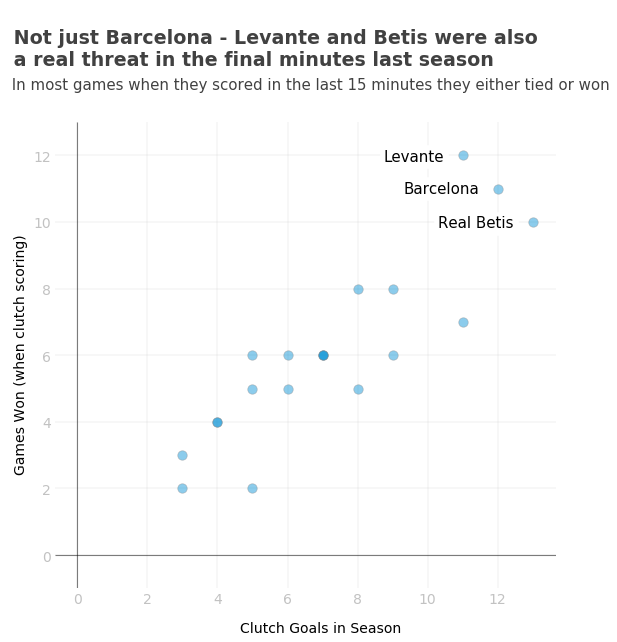

In [471]:
# Initialize the matplotlib figure
fig = plt.figure(figsize=(8, 8))

fig.set_facecolor("white")
fig.set_edgecolor("white")

colors = ['#008FD5', '#008FD5', '#008FD5', '#FC4F30', '#008FD5', '#008FD5', '#008FD5', '#008FD5',
          '#008FD5', '#008FD5', '#008FD5', '#008FD5', '#FC4F30', '#008FD5', '#FC4F30', '#008FD5',
          '#008FD5', '#008FD5', '#008FD5', '#008FD5']

ax = sns.scatterplot(df_clutch_wins['Clutch Goals (after 75th min.)'],
                     df_clutch_wins['Games Won (when clutch scoring)'], alpha=.45, s=90, edgecolor='#8B8B8B')

ax.set_facecolor('white')
ax.axhline(y=0, color='black', linewidth=1.1, alpha=.5)
ax.axvline(x=0, color='black', linewidth=1.1, alpha=.5)
ax.set_ylim([-1, 13])
ax.set_ylim([-1, 13])
ax.set_xlabel("")
ax.set_ylabel("")

#ax.set_xticklabels([' 0', '2', '4', '6', '8', '10', '12'], fontsize=14, color='#C2C2C2')
ax.tick_params(colors='#C2C2C2')

for key,spine in ax.spines.items():
    spine.set_visible(False)
    
ax.grid(which='major', axis='both', linewidth=.3)

ax.text(x=9.3, y=10.87, s="Barcelona", fontsize=15, color='black', backgroundcolor='white')
ax.text(x=8.75, y=11.82, s="Levante", fontsize=15, color='black', backgroundcolor='white')
ax.text(x=10.3, y=9.83, s="Real Betis", fontsize=15, color='black', backgroundcolor='white')

ax.text(x=4.65, y=-2.3, s='Clutch Goals in Season', fontsize=14, fontweight='medium', color='black')
ax.text(x=-1.8, y=9.33, s='Games Won (when clutch scoring)', fontsize=14, fontweight='medium', color='black', rotation=90)

ax.text(x=-2, y=14.7, s=" \n Not just Barcelona - Levante and Betis were also\n a real threat in the final minutes last season", fontsize=19, fontweight='bold', color='#414141')
ax.text(x=-2, y=14, s=" In most games when they scored in the last 15 minutes they either tied or won", fontsize=15, color='#414141')

plt.show()